In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

import wandb
import torch
import numpy as np
import networkx as nx
import agent as fba
import env as fbe
from PIL import Image
from tqdm import tqdm
from matplotlib import cm
from torch.utils.data import DataLoader


In [65]:
import json

filename = "sulinear_log.json"
with open(filename) as f_in:
    f = json.load(f_in)
json_acceptable_string = f.replace("'", "\"")
d = json.loads(json_acceptable_string)
CoopUCB = d['CoopUCB']
GosInE = d['GosInE']
Gossip_UCB = d['Gossip_UCB']
EXP3 = d['EXP3']
FedEXP3 = d['FedEXP3']

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


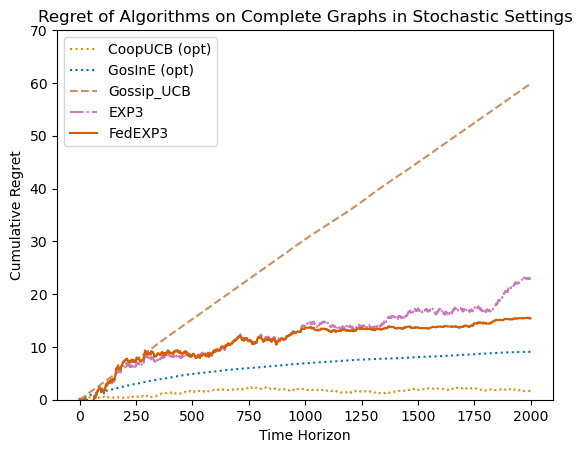

In [66]:
import matplotlib as mpl
import seaborn as sns

import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

color_pal = sns.color_palette("colorblind", 10).as_hex()
colors = color_pal
x_axis = np.arange(len(GosInE))
print(colors)

plt.plot(x_axis,CoopUCB[0:], label='CoopUCB (opt)', color=colors[1],linestyle = ':')
plt.plot(x_axis,GosInE, label='GosInE (opt)',color=colors[0], linestyle = ':')

plt.plot(x_axis,Gossip_UCB, label='Gossip_UCB',color=colors[5], linestyle = '--')

plt.plot(x_axis,EXP3, label='EXP3',color=colors[4], linestyle = '-.')

plt.plot(x_axis,FedEXP3, label='FedEXP3',color=colors[3], linestyle = '-')





plt.xlabel('Time Horizon')
plt.ylabel('Cumulative Regret')
plt.title('Regret of Algorithms on Complete Graphs in Stochastic Settings')
plt.ylim(0, 70)


plt.legend()
plt.show()

1800


/var/folders/tt/xtqbgt9s3pv16nh1_s_q2zc80000gn/T/ipykernel_97079/1768639231.py:5: RuntimeWarning: invalid value encountered in log
  y = D*np.log((x+1)*E)


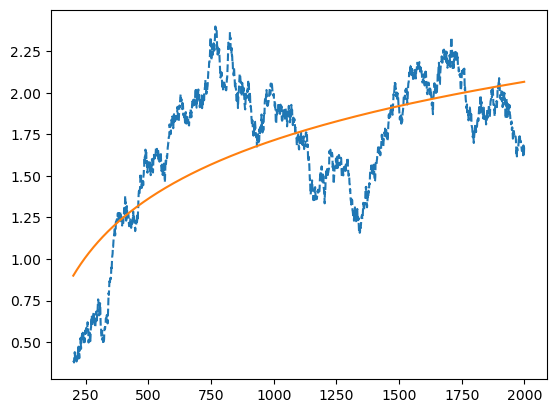

1800


/var/folders/tt/xtqbgt9s3pv16nh1_s_q2zc80000gn/T/ipykernel_97079/1768639231.py:5: RuntimeWarning: invalid value encountered in log
  y = D*np.log((x+1)*E)


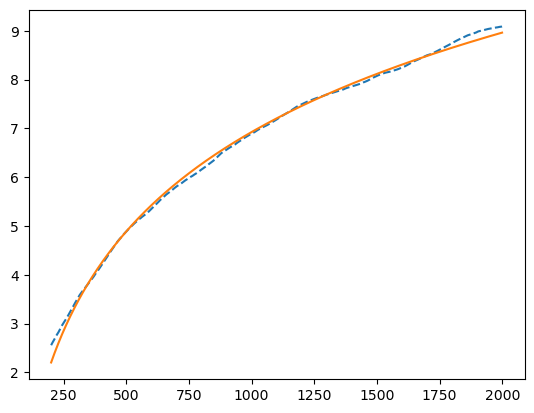

1800


/var/folders/tt/xtqbgt9s3pv16nh1_s_q2zc80000gn/T/ipykernel_97079/1768639231.py:5: RuntimeWarning: invalid value encountered in log
  y = D*np.log((x+1)*E)


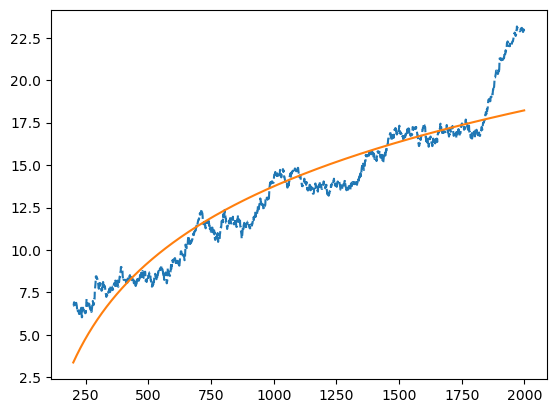

1800


/var/folders/tt/xtqbgt9s3pv16nh1_s_q2zc80000gn/T/ipykernel_97079/1768639231.py:5: RuntimeWarning: invalid value encountered in log
  y = D*np.log((x+1)*E)


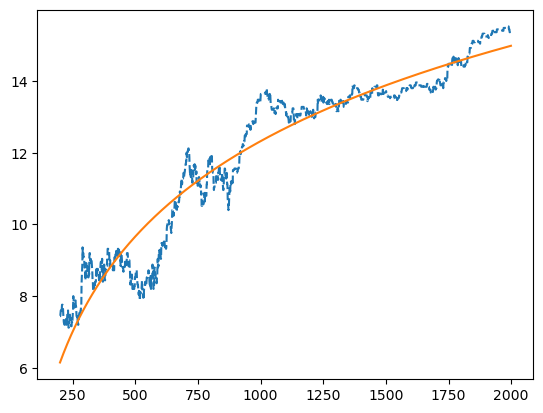

In [67]:
#log fit 
from scipy.optimize import curve_fit
alg = ['CoopUCB', 'GosInE', 'EXP3', 'FedEXP3']
def log_func(x, D, E):
    y = D*np.log((x+1)*E)
    return y

coeff = {}
fit = []

for i in np.arange(4):
    
    tmp = d[alg[i]]
    x = x_axis[200:].flatten()
    y = np.array(tmp[200:]).flatten()
    print(len(y))

    parameters, covariance = curve_fit(log_func, x, y)
    fit_D = parameters[0]
    fit_E = parameters[1]
    
    coeff[alg[i]] = fit_D

    fit_log = log_func(x, fit_D, fit_E)

    plt.figure()

    plt.plot(x, y, '--', label='data')
    plt.plot(x, fit_log, '-', label='fit')
    fit.append(fit_log)
    plt.show()

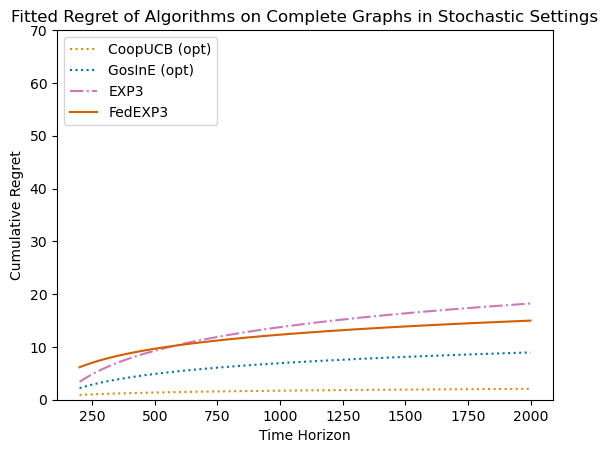

In [68]:

import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

x = x_axis[200:].flatten()
plt.plot(x,fit[0], label='CoopUCB (opt)', color=colors[1],linestyle = ':')
plt.plot(x,fit[1], label='GosInE (opt)',color=colors[0], linestyle = ':')

#plt.plot(x,fit[2], label='Gossip_UCB',color=colors[5], linestyle = '--')

plt.plot(x,fit[2], label='EXP3',color=colors[4], linestyle = '-.')

plt.plot(x,fit[3], label='FedEXP3',color=colors[3], linestyle = '-')


plt.xlabel('Time Horizon')
plt.ylabel('Cumulative Regret')
plt.title('Fitted Regret of Algorithms on Complete Graphs in Stochastic Settings')

plt.ylim(0, 70)

plt.legend(loc='upper left')
plt.show()

In [35]:
import json

filename = "sublinear_12.json"
with open(filename) as f_in:
    f = json.load(f_in)
json_acceptable_string = f.replace("'", "\"")
d = json.loads(json_acceptable_string)
#CoopUCB = d['CoopUCB']
#GosInE = d['GosInE']
#Gossip_UCB = d['Gossip_UCB']
EXP3 = d['EXP3']
FedEXP3 = d['FedEXP3']

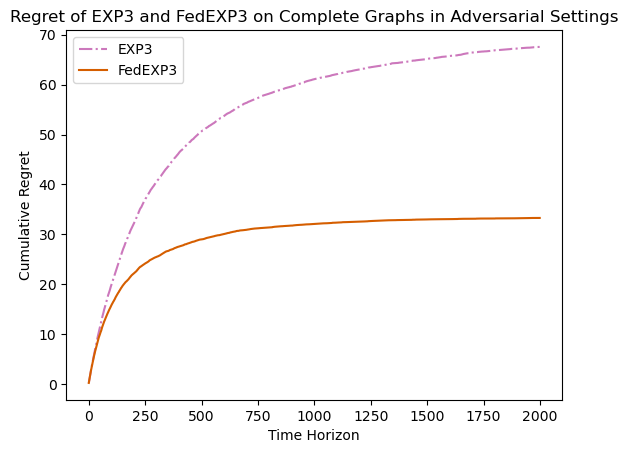

In [40]:

plt.plot(x_axis,EXP3, label='EXP3',color=colors[4], linestyle = '-.')

plt.plot(x_axis,FedEXP3, label='FedEXP3',color=colors[3], linestyle = '-')


plt.xlabel('Time Horizon')
plt.ylabel('Cumulative Regret')
plt.title('Regret of EXP3 and FedEXP3 on Complete Graphs in Adversarial Settings')


plt.legend()
plt.show()

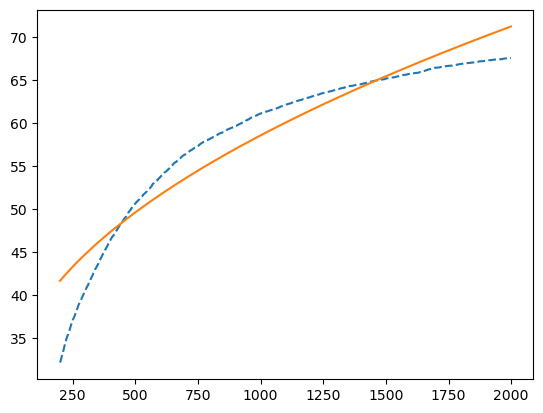

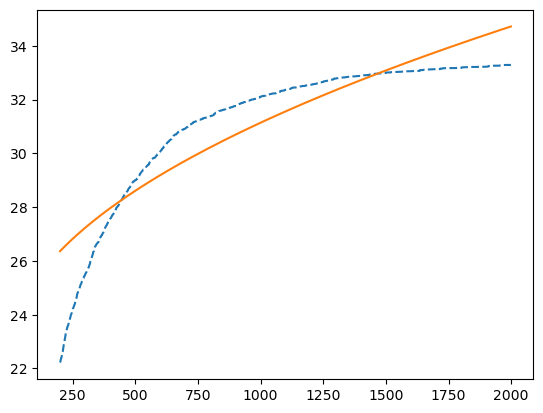

In [41]:
#log fit 
from scipy.optimize import curve_fit
alg = ['EXP3', 'FedEXP3']



#log fit 
from scipy.optimize import curve_fit

def sqrt_func(x, D, E):
    y = D*np.sqrt(x+1) + E
    return y

coeff = {}
fit = []

for i in np.arange(2):
    
    tmp = d[alg[i]]
    x = x_axis[200:].flatten()
    y = np.array(tmp[200:]).flatten()

    parameters, covariance = curve_fit(sqrt_func, x, y)
    fit_D = parameters[0]
    fit_E = parameters[1]
    
    coeff[alg[i]] = fit_D

    fit_sqrt = sqrt_func(x, fit_D, fit_E)

    plt.figure()

    plt.plot(x, y, '--', label='data')
    plt.plot(x, fit_sqrt, '-', label='fit')
    fit.append(fit_sqrt)
    plt.show()


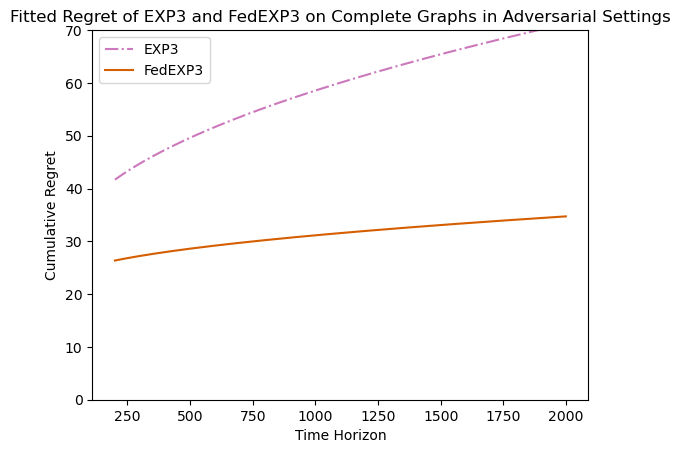

In [42]:

import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

x = x_axis[200:].flatten()

plt.plot(x,fit[0], label='EXP3',color=colors[4], linestyle = '-.')

plt.plot(x,fit[1], label='FedEXP3',color=colors[3], linestyle = '-')


plt.xlabel('Time Horizon')
plt.ylabel('Cumulative Regret')
plt.title('Fitted Regret of EXP3 and FedEXP3 on Complete Graphs in Adversarial Settings')

plt.ylim(0, 70)

plt.legend(loc='upper left')
plt.show()

In [43]:
import json

filename = "sublinear_23.json"
with open(filename) as f_in:
    f = json.load(f_in)
json_acceptable_string = f.replace("'", "\"")
d = json.loads(json_acceptable_string)
#CoopUCB = d['CoopUCB']
#GosInE = d['GosInE']
#Gossip_UCB = d['Gossip_UCB']
EXP3 = d['EXP3']
FedEXP3 = d['FedEXP3']


#log fit 
from scipy.optimize import curve_fit
alg = ['EXP3', 'FedEXP3']



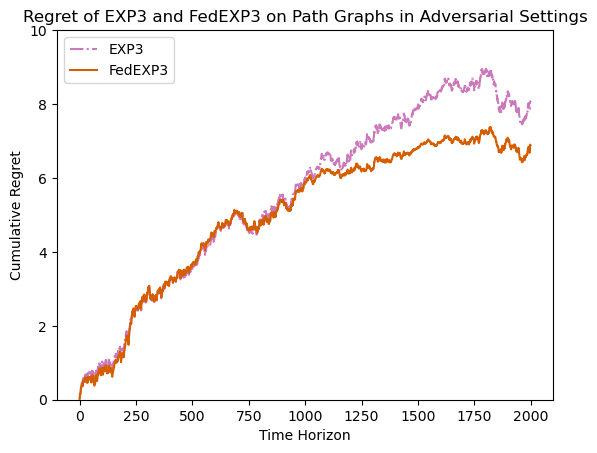

In [52]:

plt.plot(x_axis,EXP3, label='EXP3',color=colors[4], linestyle = '-.')

plt.plot(x_axis,FedEXP3, label='FedEXP3',color=colors[3], linestyle = '-')


plt.xlabel('Time Horizon')
plt.ylabel('Cumulative Regret')
plt.title('Regret of EXP3 and FedEXP3 on Path Graphs in Adversarial Settings')


plt.ylim(0, 10)


plt.legend()
plt.show()

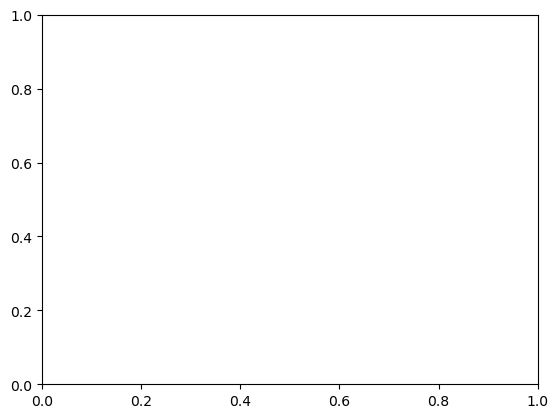

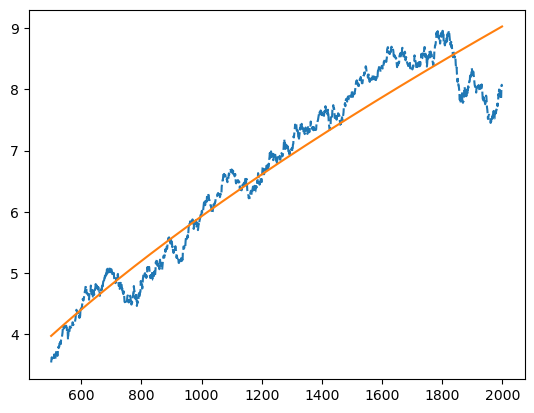

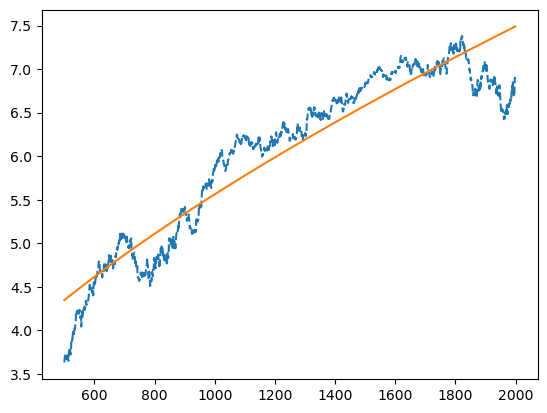

In [48]:
regret_dict = {}
alg = ['EXP3', 'FedEXP3']


#log fit 
from scipy.optimize import curve_fit

def sqrt_func(x, D, E):
    y = D*np.power(x, 2/3) + E
    return y

coeff = {}
fit = []

for i in np.arange(2):
    
    tmp = d[alg[i]]
    x = x_axis[500:].flatten()
    y = np.array(tmp[500:]).flatten()

    parameters, covariance = curve_fit(sqrt_func, x, y)
    fit_D = parameters[0]
    fit_E = parameters[1]
    
    coeff[alg[i]] = fit_D

    fit_sqrt = sqrt_func(x, fit_D, fit_E)

    plt.figure()
    
    fit.append(fit_sqrt)

    plt.plot(x, y, '--', label='data')
    plt.plot(x, fit_sqrt, '-', label='fit')
    plt.show()


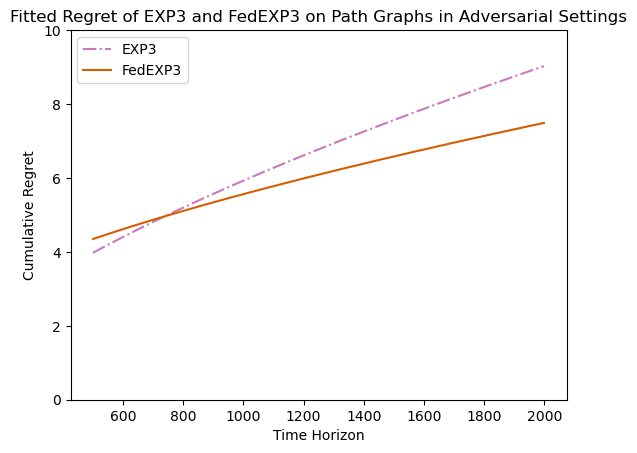

In [53]:

import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

x = x_axis[500:].flatten()

plt.plot(x,fit[0], label='EXP3',color=colors[4], linestyle = '-.')

plt.plot(x,fit[1], label='FedEXP3',color=colors[3], linestyle = '-')


plt.xlabel('Time Horizon')
plt.ylabel('Cumulative Regret')
plt.title('Fitted Regret of EXP3 and FedEXP3 on Path Graphs in Adversarial Settings')

plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.show()

In [70]:
import json

filename = "linear.json"
with open(filename) as f_in:
    f = json.load(f_in)
json_acceptable_string = f.replace("'", "\"")
d = json.loads(json_acceptable_string)
CoopUCB = d['CoopUCB']
GosInE = d['GosInE']
Gossip_UCB = d['Gossip_UCB']
EXP3 = d['EXP3']
FedEXP3 = d['FedEXP3']

#log fit 
from scipy.optimize import curve_fit
alg = ['EXP3', 'FedEXP3']



['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


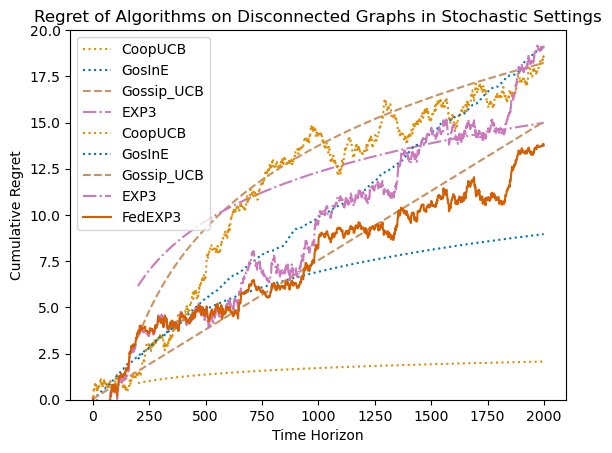

In [71]:
import matplotlib as mpl
import seaborn as sns

import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

color_pal = sns.color_palette("colorblind", 10).as_hex()
colors = color_pal
x_axis = np.arange(len(GosInE))
print(colors)

plt.plot(x_axis,CoopUCB[0:], label='CoopUCB', color=colors[1],linestyle = ':')
plt.plot(x_axis,GosInE, label='GosInE',color=colors[0], linestyle = ':')

plt.plot(x_axis,Gossip_UCB, label='Gossip_UCB',color=colors[5], linestyle = '--')

plt.plot(x_axis,EXP3, label='EXP3',color=colors[4], linestyle = '-.')

plt.plot(x_axis,FedEXP3, label='FedEXP3',color=colors[3], linestyle = '-')





plt.xlabel('Time Horizon')
plt.ylabel('Cumulative Regret')
plt.title('Regret of Algorithms on Disconnected Graphs in Stochastic Settings')
plt.ylim(0, 20)


plt.legend()
plt.show()

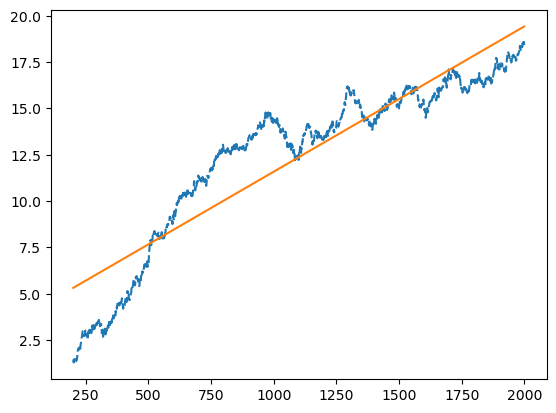

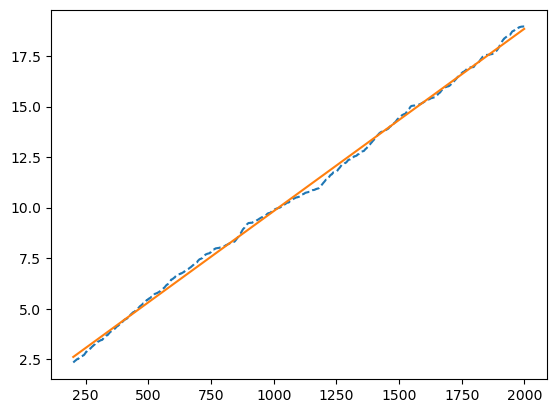

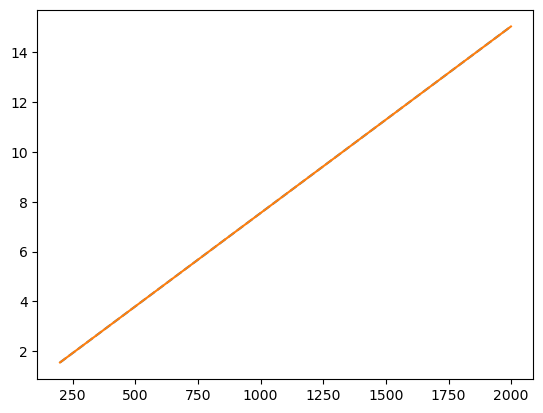

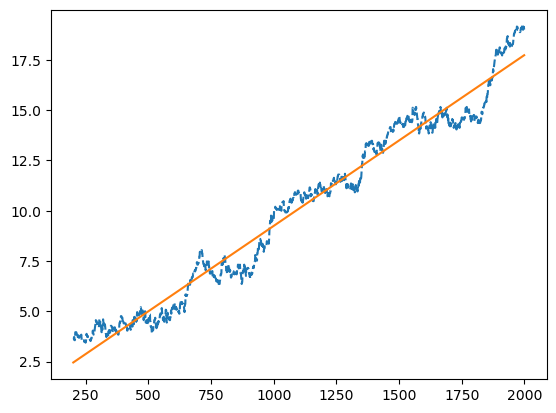

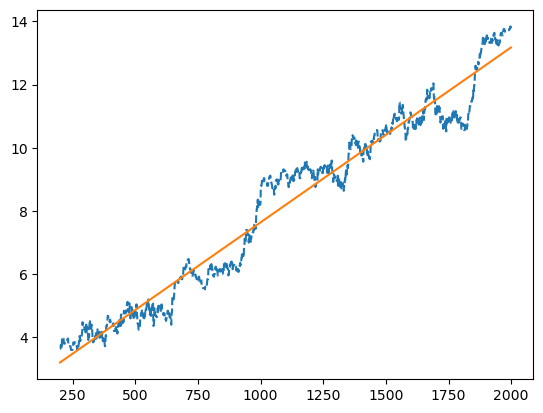

In [72]:


#log fit 
from scipy.optimize import curve_fit
alg = ['CoopUCB', 'GosInE', 'Gossip_UCB', 'EXP3', 'FedEXP3']

def log_func(x, D, E):
    y = D*(x) + E
    return y

coeff = {}

fit = []
for i in np.arange(5):
    
    tmp = d[alg[i]]
    x = x_axis[200:].flatten()
    y = np.array(tmp[200:]).flatten()

    parameters, covariance = curve_fit(log_func, x, y)
    fit_D = parameters[0]
    fit_E = parameters[1]
    
    coeff[alg[i]] = fit_D

    fit_log = log_func(x, fit_D, fit_E)

    plt.figure()

    plt.plot(x, y, '--', label='data')
    plt.plot(x, fit_log, '-', label='fit')
    fit.append(fit_log)
    plt.show()


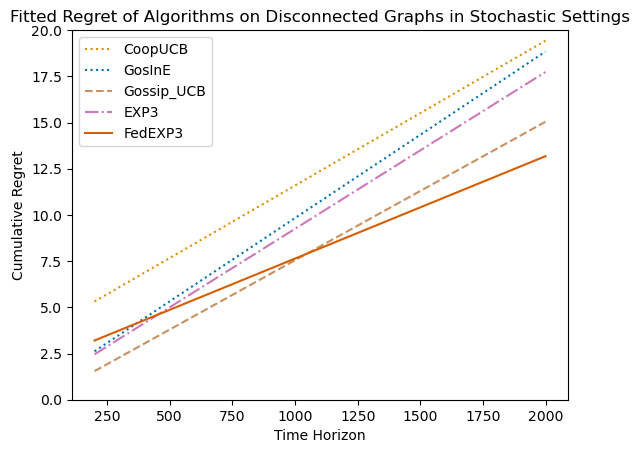

In [73]:

import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

x = x_axis[200:].flatten()
plt.plot(x,fit[0], label='CoopUCB', color=colors[1],linestyle = ':')
plt.plot(x,fit[1], label='GosInE',color=colors[0], linestyle = ':')

plt.plot(x,fit[2], label='Gossip_UCB',color=colors[5], linestyle = '--')

plt.plot(x,fit[3], label='EXP3',color=colors[4], linestyle = '-.')

plt.plot(x,fit[4], label='FedEXP3',color=colors[3], linestyle = '-')


plt.xlabel('Time Horizon')
plt.ylabel('Cumulative Regret')
plt.title('Fitted Regret of Algorithms on Disconnected Graphs in Stochastic Settings')

plt.ylim(0, 20)

plt.legend(loc='upper left')
plt.show()